In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path

In [12]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)


### Data cleaner

In [13]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters,
                    dp.check_dataset,
                    cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


### Column meta data + timeseries classes

In [15]:
testing_submeters = test._data

example_data_dict = {'column_1': {'Name': 'DB_11', 
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_2': {'Name': 'DB_3',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_3': {'Name': 'DB_4',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_4': {'Name': 'DB_5',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_5': {'Name': 'DB_6',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_6': {'Name': 'DB_9',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_7': {'Name': 'DB_10',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'column_8': {'Name': 'DB_12',
                                  'Units': viz_schema.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [20]:
db_11 = sdp.ColumnSpecificData(testing_submeters['DB_11'], example_data_dict['column_1'])
db_11

ColumnMetaData(data=Datetime
2022-01-01 00:00:00     7.569785
2022-01-01 00:30:00     6.771641
2022-01-01 01:00:00     8.596677
2022-01-01 01:30:00     7.786236
2022-01-01 02:00:00     6.929411
                         ...    
2022-12-31 21:30:00     9.456592
2022-12-31 22:00:00    10.520131
2022-12-31 22:30:00     8.988758
2022-12-31 23:00:00     9.155125
2022-12-31 23:30:00    10.842518
Name: DB_11, Length: 17520, dtype: float64, column_data={'Name': 'DB_11', 'Units': 'kWh', 'Freq': '30T', 'Type': <DataType.FLOAT: <class 'float'>>})

In [17]:
column_lists = sdp.generate_column_classes(testing_submeters, example_data_dict)
column_lists

[ColumnMetaData(data=Datetime
 2022-01-01 00:00:00     7.569785
 2022-01-01 00:30:00     6.771641
 2022-01-01 01:00:00     8.596677
 2022-01-01 01:30:00     7.786236
 2022-01-01 02:00:00     6.929411
                          ...    
 2022-12-31 21:30:00     9.456592
 2022-12-31 22:00:00    10.520131
 2022-12-31 22:30:00     8.988758
 2022-12-31 23:00:00     9.155125
 2022-12-31 23:30:00    10.842518
 Name: DB_11, Length: 17520, dtype: float64, column_data={'Name': 'DB_11', 'Units': 'kWh', 'Freq': '30T', 'Type': <DataType.FLOAT: <class 'float'>>}),
 ColumnMetaData(data=Datetime
 2022-01-01 00:00:00    0.576742
 2022-01-01 00:30:00    0.497238
 2022-01-01 01:00:00    0.554560
 2022-01-01 01:30:00    0.495641
 2022-01-01 02:00:00    0.558504
                          ...   
 2022-12-31 21:30:00    0.683685
 2022-12-31 22:00:00    0.559935
 2022-12-31 22:30:00    0.559554
 2022-12-31 23:00:00    0.559705
 2022-12-31 23:30:00    0.694768
 Name: DB_3, Length: 17520, dtype: float64, column_d

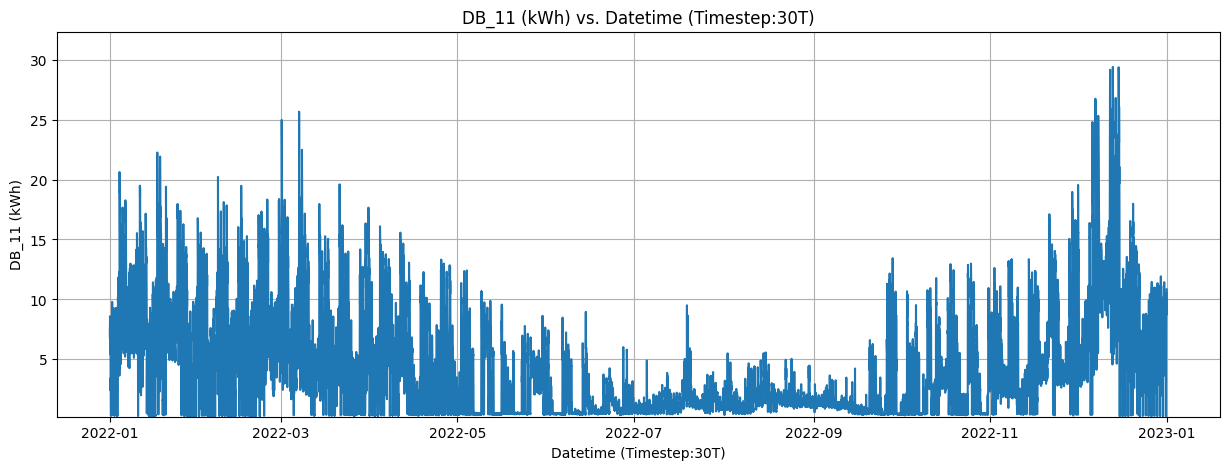

In [18]:
column_lists[0].plot_all()